In [26]:
%cd '/mnt/c/Users/malin/Documents/Facultate/honours/UMCG/ICU_Augment_and_Detect'

/mnt/c/Users/malin/Documents/Facultate/honours/UMCG/ICU_Augment_and_Detect


In [27]:
import matplotlib.pyplot as plt
import cv2
import os
import sys
import numpy as np
import pickle
import csv
import seaborn as sn
import pandas as pd
sys.path.append(os.getcwd())


In [28]:
save_path = 'categorization/model_saves/'

def load_histories(save_path):
    history = '/history.pickle'
    models = ["mouth", "face", "skin", "eyes", "stacked"]
    all_histories = {}
    for model in models:
        hist_path = save_path + str(model) + history
        if os.path.isfile(hist_path):
            print(hist_path)
            hist_file = open(hist_path, "rb")
            all_histories[model] = pickle.load(hist_file)
    return all_histories

all_histories = load_histories(save_path)

categorization/model_saves/mouth/history.pickle
categorization/model_saves/face/history.pickle
categorization/model_saves/skin/history.pickle
categorization/model_saves/eyes/history.pickle
categorization/model_saves/stacked/history.pickle


In [36]:
# print(all_histories["mouth"])
print(all_histories["stacked"])

{'loss': [0.5943364915640458, 0.4609891258288121, 0.3599340976148412, 0.31124784635460895, 0.2699459862449895, 0.23200450988783353, 0.1912908832664075, 0.15234304100706958, 0.12791230194810507, 0.09262232007323831], 'accuracy': [0.6847826, 0.7536232, 0.7789855, 0.81884056, 0.865942, 0.8768116, 0.942029, 0.9782609, 0.98913044, 0.98913044], 'auc_4': [0.63180923, 0.8691119, 0.9838158, 0.98766446, 0.9960197, 0.99789464, 0.9999999, 0.9998355, 0.9988157, 0.9998684], 'false_positives_4': [23.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'true_positives_4': [12.0, 12.0, 15.0, 26.0, 39.0, 42.0, 60.0, 70.0, 73.0, 73.0], 'true_negatives_4': [177.0, 196.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0], 'false_negatives_4': [64.0, 64.0, 61.0, 50.0, 37.0, 34.0, 16.0, 6.0, 3.0, 3.0], 'val_loss': [0.6715406179428101, 0.6718506217002869, 0.6757838726043701, 0.6851900815963745, 0.7037702798843384, 0.7092245221138, 0.7229578495025635, 0.7456380724906921, 0.7784735560417175, 0.823654234409332

mouth
face
skin
eyes
stacked


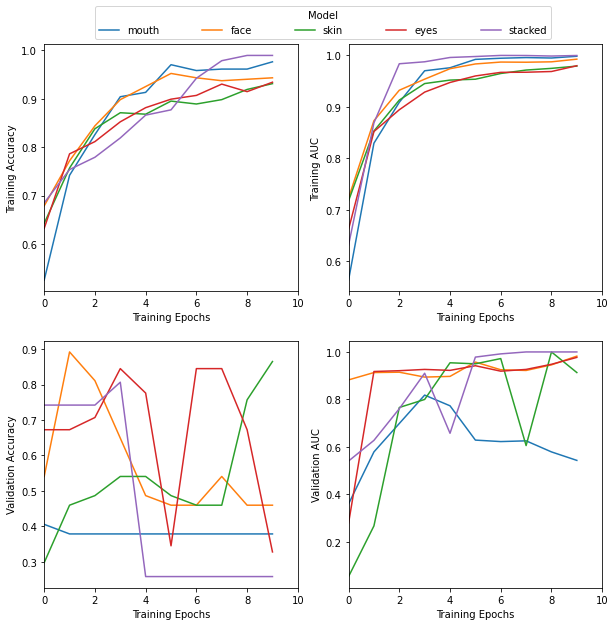

In [39]:
def plot_all_auc_acc(all_histories):

    fig = plt.figure(figsize=(10,10))

    plt.subplot(2,2,1)
    for key in all_histories:
        plt.plot(all_histories[key]["accuracy"], label = str(key))
    plt.xlim((0,10))
    plt.xlabel('Training Epochs')
    plt.ylabel('Training Accuracy')
    # plt.figure()
    # plt.legend()
    plt.legend(bbox_to_anchor=(0.2, 1.02, 1.8, .102), loc='lower left',
            ncol=5, mode="expand", borderaxespad=0., title = "Model")

    plt.subplot(2,2,2)
    i = 0
    for key in all_histories:
        print(key)
        if i == 0:
            search = "auc"
        else:
            search = "auc_" + str(i)
        plt.plot(all_histories[key][search], label = str(key))
        i +=1 
    plt.xlim((0,10))
    plt.xlabel('Training Epochs')
    plt.ylabel('Training AUC')
    # plt.figure()
    # plt.legend()

    plt.subplot(2,2,3)
    for key in all_histories:
        plt.plot(all_histories[key]["val_accuracy"], label = str(key))

    plt.xlim((0,10))
    plt.xlabel('Training Epochs')
    plt.ylabel('Validation Accuracy')
    # plt.figure()
    # plt.legend()

    plt.subplot(2,2,4)
    i = 0
    for key in all_histories:
        if i == 0:
            search = "val_auc"
        else:
            search = "val_auc_" + str(i)
        plt.plot(all_histories[key][search], label = str(key))
        i +=1 

    plt.xlim((0,10))
    plt.xlabel('Training Epochs')
    plt.ylabel('Validation AUC')
    # plt.legend()

    plt.savefig("data/plots/models_acc_auc.png")
    plt.show()

plot_all_auc_acc(all_histories)

In [43]:
def print_raw(all_histories):
    with open("data/exact_values.csv", "w") as data_file:
        writer = csv.writer(data_file, delimiter=',')
        header = ['Model', 'Training Accuracy', 'Training AUC', 'Validation Accuracy', 'Validation AUC']
        writer.writerow(header)
        i = 0 
        for model in all_histories:
            final = len(all_histories[model]["accuracy"]) - 1
            if i == 0 :
                auc = "auc"
                val_auc = "val_auc"
            else:
                auc = "auc_" + str(i)
                val_auc = "val_auc_" + str(i)
            row = [str(model), all_histories[model]["accuracy"][final], all_histories[model][auc][final], all_histories[model]["val_accuracy"][final], all_histories[model][val_auc][final]]
            writer.writerow(row)
            i += 1



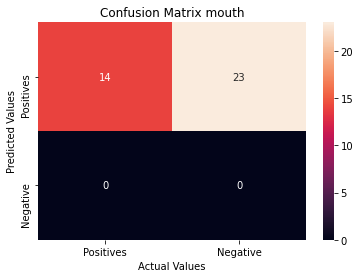

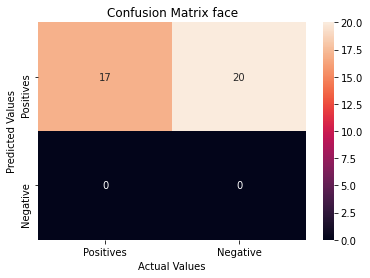

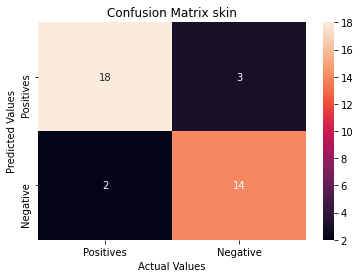

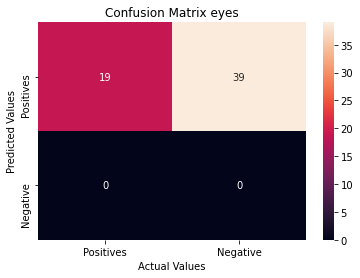

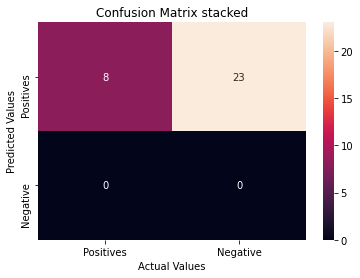

In [42]:
def plot_confusion_matrix(all_histories):
    i = 0
    for model in all_histories:
        final = len(all_histories[model]["accuracy"]) - 1
        fp = "val_false_positives"
        tp = "val_true_positives"
        tn = "val_true_negatives"
        fn = "val_false_negatives" 
        if i != 0:
            fp = fp + "_" + str(i)
            tp = tp + "_" + str(i)
            tn = tn + "_" + str(i)
            fn = fn + "_" + str(i) 
        matrix = [[all_histories[model][tp][final], all_histories[model][fp][final]],
                    [all_histories[model][fn][final], all_histories[model][tn][final]]]
        df_cm = pd.DataFrame(matrix, index = ["Positives", "Negative"],
              columns = ["Positives", "Negative"])
        ax = plt.axes()
        sn.heatmap(df_cm, annot=True, ax=ax)
        ax.set_title('Confusion Matrix ' + str(model))
        ax.set_xlabel("Actual Values")
        ax.set_ylabel("Predicted Values")
        plt.savefig("data/plots/confusion_matrix_" + str(model) + ".png")
        plt.show()
        # plt.matshow(matrix)
        i += 1

plot_confusion_matrix(all_histories)

In [ ]:


ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()